# How to read model weights

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

import sys
sys.path.append("../")

import resnet

In [2]:
arguments = {
    "epochs": 70,
    "seed": 2,
    "sample_freq": 400,
    "seq_length": 4096,
    "scale_multiplier": 10,
    "batch_size": 32,
    "lr": 0.001,
    "patience": 7,
    "min_lr": 1e-7,
    "lr_factor": 0.1,
    "net_filter_size": [64, 128, 196, 256, 320],
    "net_seq_length": [4096, 1024, 256, 64, 16],
    "dropout_rate": 0.8,
    "kernel_size": 17,
    "folder": "model/",
    "traces_dset": "tracings",
    "ids_dset": '',
    "age_col": "age",
    "ids_col": None,
    "cuda": "store_true",
    "n_valid": 100,
    "device": "cpu",
    "path_to_traces": "./data/exams_part16.hdf5",
    "path_to_csv": "./data/exams_bak.csv"
}

In [3]:
# instantiating the model object
model = resnet.ResNet1d(
    input_dim=(12, arguments['seq_length']),
    blocks_dim=list(zip(arguments['net_filter_size'], arguments['net_seq_length'])),
    n_classes=1,
    kernel_size=arguments['kernel_size'],
    dropout_rate=arguments['dropout_rate']
)

In [4]:
# Loading the model weights in the model object
model = (torch.load(
    '../model/model.pth',
    weights_only=False,
    map_location=torch.device('cpu')
))

In [5]:
model = torch.load(
    '../model/model.pth',
    weights_only=False,
    map_location=torch.device('cpu')
)

# All the weights and biases in the model

In [6]:
for key in model['model'].keys():
    print(key)

conv1.weight
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
resblock1d_0.conv1.weight
resblock1d_0.bn1.weight
resblock1d_0.bn1.bias
resblock1d_0.bn1.running_mean
resblock1d_0.bn1.running_var
resblock1d_0.bn1.num_batches_tracked
resblock1d_0.conv2.weight
resblock1d_0.bn2.weight
resblock1d_0.bn2.bias
resblock1d_0.bn2.running_mean
resblock1d_0.bn2.running_var
resblock1d_0.bn2.num_batches_tracked
resblock1d_1.conv1.weight
resblock1d_1.bn1.weight
resblock1d_1.bn1.bias
resblock1d_1.bn1.running_mean
resblock1d_1.bn1.running_var
resblock1d_1.bn1.num_batches_tracked
resblock1d_1.conv2.weight
resblock1d_1.bn2.weight
resblock1d_1.bn2.bias
resblock1d_1.bn2.running_mean
resblock1d_1.bn2.running_var
resblock1d_1.bn2.num_batches_tracked
resblock1d_1.skip_connection.1.weight
resblock1d_2.conv1.weight
resblock1d_2.bn1.weight
resblock1d_2.bn1.bias
resblock1d_2.bn1.running_mean
resblock1d_2.bn1.running_var
resblock1d_2.bn1.num_batches_tracked
resblock1d_2.conv2.weight
resblo

In [7]:
# Explore the distribution of absolute weights in the first convolution layer
percentiles = []
values = []
for i in range(10):
    percentile = i * 10 + 10
    percentiles.append(percentile)
    values.append(np.percentile(abs(model['model']['conv1.weight']), percentile))
pd.DataFrame({
    "percentile": percentiles,
    "values": values
})


,percentile,values
0,10,0.120160
1,20,0.243571
2,30,0.376799
3,40,0.520090
4,50,0.676938
5,60,0.864321
6,70,1.072185
7,80,1.381231
8,90,1.841472
9,100,5.513628


In [8]:
# save numpy array
np.save("conv1_weight.npy", model['model']['conv1.weight'].numpy())

In [9]:
# to confirm the file exists, the output has to be True
from pathlib import Path
p = Path("conv1_weight.npy")
p.exists()

True

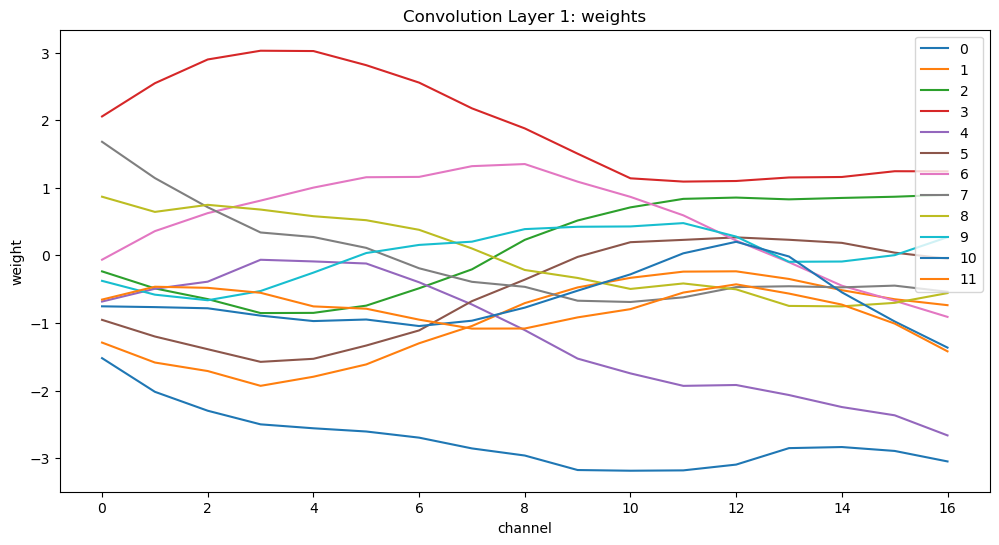

In [10]:
plt.figure(figsize=(12, 6))
for in_channel in range(12):
    df = pd.DataFrame({'coef': model['model']['conv1.weight'][0][in_channel],
                    'element': np.arange(17)})
    plt.plot(df['element'], df['coef'], label=in_channel)
    plt.xlabel("channel")
    plt.ylabel("weight")
    plt.title("Convolution Layer 1: weights")
plt.legend()
plt.show()